## Fall 2020 CS559 Final Exam Part 2. (80 pts)

This is the second part of the final exam. In this section, there are 3 questions and any use of internet or resources are not permitted. You are allowed to use any built-in functions and libraries. You are going to submit two files in `ipynb` and `html` formats. Do not erase any middle work even the codes did not run correctly. If the code did not run, you can just work on the next command line. 

### 1. Data Preprocessing. (20 pts)
This question involves data preprocessing that needs to be done before modeling. The data comes from a global company, including orders from 2012 to 2015. Import the dataset `Orders.csv`.

1-1. Check `Profit` and `Sales` in the dataset, convert these two columns to numeric type and name them `New Profit` and "New Sales", respectively. (4 pts)

In [1]:
import numpy as np
import pandas as pd
order_data = pd.read_csv('Orders.csv')
order_data

Row.ID                  Order.ID Order.Date Ship.Date       Ship.Mode  \
0       40098  CA-2014-AB10015140-41954   11/11/14  11/13/14     First Class   
1       26341    IN-2014-JR162107-41675     2/5/14    2/7/14    Second Class   
2       25330    IN-2014-CR127307-41929   10/17/14  10/18/14     First Class   
3       13524   ES-2014-KM1637548-41667    1/28/14   1/30/14     First Class   
4       47221   SG-2014-RH9495111-41948    11/5/14   11/6/14        Same Day   
...       ...                       ...        ...       ...             ...   
51285   29002   IN-2015-KE1642066-42174    6/19/15   6/19/15        Same Day   
51286   34337  US-2014-ZD21925140-41765     5/6/14   5/10/14  Standard Class   
51287   31315  CA-2012-ZD21925140-41147    8/26/12   8/31/12    Second Class   
51288    9596   MX-2013-RB1979518-41322    2/17/13   2/21/13  Standard Class   
51289    6147   MX-2013-MC1810093-41416    5/22/13   5/26/13    Second Class   

        Customer.ID       Customer.Name      Segment  Postal.Code  \
0      AB-100151402       Aaron Bergman     Consumer      73120.0   
1         JR-162107       Justin Ritter    Corporate          NaN   
2         CR-127307        Craig Reiter     Consumer          NaN   
3        KM-1637548    Katherine Murray  Home Office          NaN   
4        RH-9495111         Rick Hansen     Consumer          NaN   
...             ...                 ...          ...          ...   
51285    KE-1642066     Katrina Edelman    Corporate          NaN   
51286  ZD-219251408  Zuschuss Donatelli     Consumer      37421.0   
51287  ZD-219251404  Zuschuss Donatelli     Consumer      94109.0   
51288    RB-1979518          Ross Baird  Home Office          NaN   
51289    MC-1810093       Mick Crebagga     Consumer          NaN   

                City  ...   Product.ID         Category Sub.Category  \
0      Oklahoma City  ...  TEC-PH-5816       Technology       Phones   
1         Wollongong  ...  FUR-CH-5379        Furniture       Chairs   
2           Brisbane  ...  TEC-PH-5356       Technology       Phones   
3             Berlin  ...  TEC-PH-5267       Technology       Phones   
4              Dakar  ...  TEC-CO-6011       Technology      Copiers   
...              ...  ...          ...              ...          ...   
51285           Kure  ...  OFF-FA-3072  Office Supplies    Fasteners   
51286    Chattanooga  ...  FUR-FU-4070        Furniture  Furnishings   
51287  San Francisco  ...  OFF-AR-5321  Office Supplies          Art   
51288       Valinhos  ...  OFF-BI-2919  Office Supplies      Binders   
51289       Tipitapa  ...  OFF-PA-3990  Office Supplies        Paper   

                                        Product.Name      Sales Quantity  \
0                                   Samsung Convoy 3    $221.98        2   
1          Novimex Executive Leather Armchair, Black  $3,709.40        9   
2                  Nokia Smart Phone, with Caller ID  $5,175.17        9   
3                     Motorola Smart Phone, Cordless  $2,892.51        5   
4                     Sharp Wireless Fax, High-Speed  $2,832.96        8   
...                                              ...        ...      ...   
51285                  Advantus Thumb Tacks, 12 Pack     $65.10        5   
51286  Eldon Image Series Desk Accessories, Burgundy     $16.72        5   
51287                                     Newell 341      $8.56        2   
51288                        Acco Index Tab, Economy     $13.44        2   
51289        Eaton Computer Printout Paper, 8.5 x 11     $61.38        3   

      Discount    Profit Shipping.Cost  Order.Priority  
0          0.0    $62.15        40.770            High  
1          0.1  -$288.77       923.630        Critical  
2          0.1   $919.97       915.490          Medium  
3          0.1   -$96.54       910.160          Medium  
4          0.0   $311.52       903.040        Critical  
...        ...       ...           ...             ...  
51285      0.0     $4.50         1.010  

In [2]:
profit = order_data['Profit'].str.replace('$', '')
profit = profit.str.replace(',', '')
order_data['New Profit'] = pd.to_numeric(profit)
order_data['New Profit'].head(50)

0       62.15
1     -288.77
2      919.97
3      -96.54
4      311.52
5      763.28
6      564.84
7      996.48
8       54.71
9        5.48
10       4.66
11     647.55
12    1151.40
13     622.02
14    1036.08
15     186.95
16      -2.52
17    3979.08
18      28.40
19     818.28
20     276.84
21       4.86
22     358.02
23    1898.40
24     445.52
25     526.50
26     720.36
27    1364.24
28     121.44
29     582.36
30    -148.46
31     763.16
32      75.17
33     561.48
34      61.39
35    1068.66
36      20.96
37      11.47
38    1697.67
39     511.10
40     -77.20
41     632.52
42    2097.03
43     404.73
44     377.24
45      38.04
46     720.75
47     110.34
48     500.01
49     868.12
Name: New Profit, dtype: float64

In [3]:
sales = order_data['Sales'].str.replace('$', '')
sales = sales.str.replace(',', '')
order_data['New Sales'] = pd.to_numeric(sales)
order_data['New Sales'].head(50)

0      221.98
1     3709.40
2     5175.17
3     2892.51
4     2832.96
5     2862.68
6     1822.08
7     5244.84
8      341.96
9       48.71
10      17.94
11    4626.15
12    2616.96
13    2221.80
14    3701.52
15    1869.59
16      12.62
17    7958.58
18    2565.59
19    3409.74
20    1977.72
21     242.94
22    2754.00
23    5273.70
24    1713.84
25    2106.50
26    1715.16
27    3069.74
28     247.84
29    1878.72
30    1696.64
31    2402.87
32     668.16
33    2526.93
34     323.10
35    3817.26
36     279.46
37      34.77
38    4141.02
39    2875.10
40    3200.60
41    4518.78
42    5667.87
43    5785.02
44    3018.62
45      86.45
46    2092.50
47    2761.20
48    2174.13
49    3473.14
Name: New Sales, dtype: float64

In [4]:
order_data.head()

Row.ID                  Order.ID Order.Date Ship.Date     Ship.Mode  \
0   40098  CA-2014-AB10015140-41954   11/11/14  11/13/14   First Class   
1   26341    IN-2014-JR162107-41675     2/5/14    2/7/14  Second Class   
2   25330    IN-2014-CR127307-41929   10/17/14  10/18/14   First Class   
3   13524   ES-2014-KM1637548-41667    1/28/14   1/30/14   First Class   
4   47221   SG-2014-RH9495111-41948    11/5/14   11/6/14      Same Day   

    Customer.ID     Customer.Name      Segment  Postal.Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

   ... Sub.Category                               Product.Name      Sales  \
0  ...       Phones                           Samsung Convoy 3    $221.98   
1  ...       Chairs  Novimex Executive Leather Armchair, Black  $3,709.40   
2  ...       Phones          Nokia Smart Phone, with Caller ID  $5,175.17   
3  ...       Phones             Motorola Smart Phone, Cordless  $2,892.51   
4  ...      Copiers             Sharp Wireless Fax, High-Speed  $2,832.96   

  Quantity Discount    Profit Shipping.Cost Order.Priority New Profit  \
0        2      0.0    $62.15         40.77           High      62.15   
1        9      0.1  -$288.77        923.63       Critical    -288.77   
2        9      0.1   $919.97        915.49         Medium     919.97   
3        5      0.1   -$96.54        910.16         Medium     -96.54   
4        8      0.0   $311.52        903.04       Critical     311.52   

   New Sales  
0     221.98  
1    3709.40  
2    5175.17  
3    2892.51  
4    2832.96  

[5 rows x 26 columns]

1-2. Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year’s inventory. He wants you to answer the following questions: (4 pts)
- Is there any seasonal sales trend in your company? ***Yes, there is a seasonal sales trend in the data. See below for explanation.***
- Is there any seasonal trend of different categories of products? ***Yes, there is also a seasonal trend with different product categories.***

In [5]:
from matplotlib import pyplot as plt
from datetime import datetime
seasonal_frame = pd.DataFrame(pd.Series(order_data['Category'].values, index=pd.DatetimeIndex(order_data['Order.Date'].values)), columns=['Category'])
seasonal_frame.head()

Category
2014-11-11  Technology
2014-02-05   Furniture
2014-10-17  Technology
2014-01-28  Technology
2014-11-05  Technology

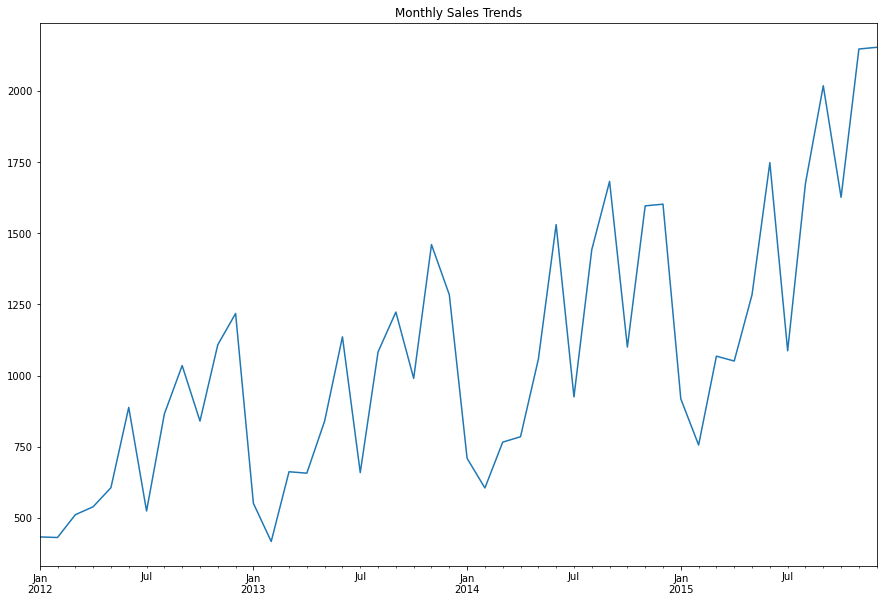

In [6]:
fig = plt.figure(figsize=(15,10))
resample = seasonal_frame.resample('M').count()
resample['Category'].plot(kind='line', title='Monthly Sales Trends')

**There seems to be a regularity in the sales going up and down based on the chart above. Let's take a closer look at the 2014 and 2015 years to be sure.**

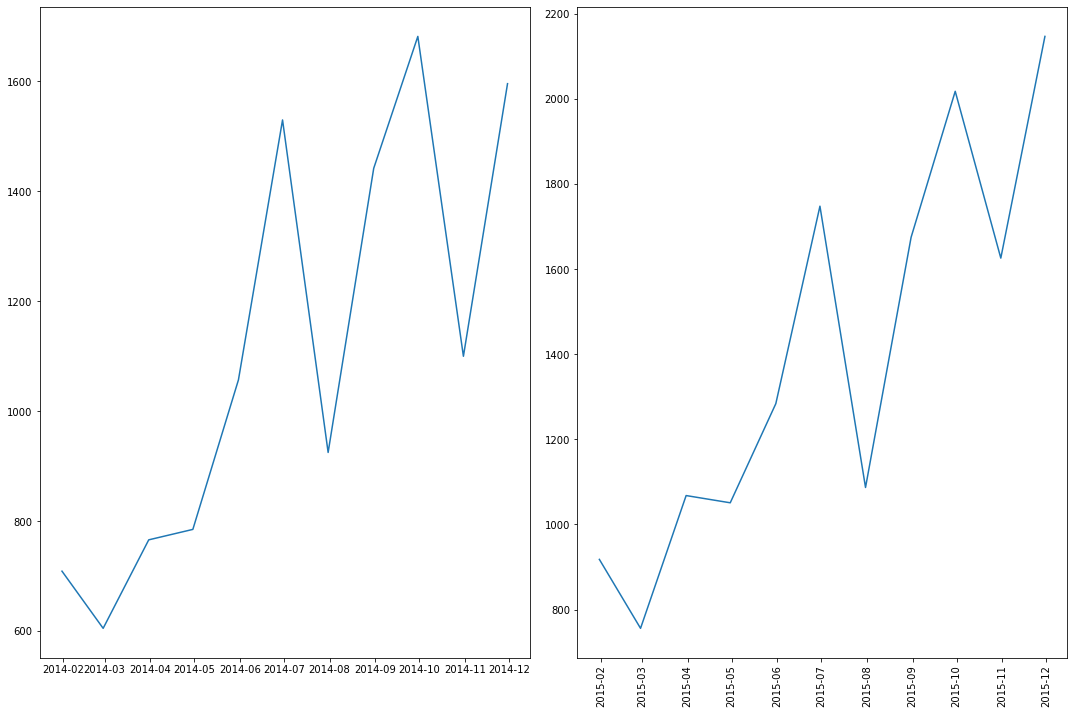

In [7]:
fig, ax = plt.subplots(1, 2, figsize=((15,10)))
year_start = datetime(2013, 12, 31)
year_end = datetime(2014, 12, 31)
year_data = resample.loc[(resample.index > year_start) & (resample.index < year_end)]
ax[0].plot(year_data)

plt.xticks(rotation=90)

year_start = datetime(2014, 12, 31)
year_end = datetime(2015, 12, 31)
year_data = resample.loc[(resample.index > year_start) & (resample.index < year_end)]
ax[1].plot(year_data)
plt.tight_layout(True)
plt.xticks(rotation=90)
plt.show()

**Based on the above layout, there seems to be an upward trend during the Spring and Summer months. Then, there seems to be a downward trend during the beginning of Fall, the end of Fall, and the end of Winter.**

In [8]:
len(seasonal_frame.groupby('Category'))

3

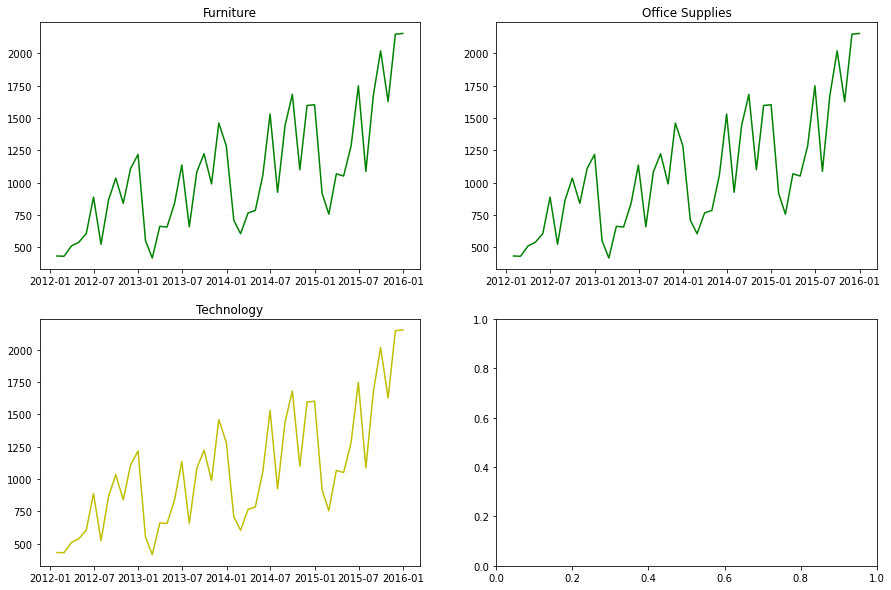

In [9]:
fig, ax = plt.subplots(2, 2, figsize=((15,10)))
x = 0
y = 0
color = ['g', 'y', 'r']
for category, frame in seasonal_frame.groupby('Category'):
    resample = seasonal_frame.resample('M').count()
    ax[x][y].plot(resample, color=color[x])
    ax[x][y].set_title(category)
    y += 1
    if y > 1:
        x += 1
        y = 0

**Much like above, this shows that there is a seasonal trend with each of the product categories.**

1-3. Your manager required you to give a brief report (Plots + Interpretations) on returned orders from the `Returns.csv` dataset. (10 pts)

- How much profit did we lose for each year?

```
    Profit loss for the year 2012 was $17477.26
    Profit loss for the year 2013 was $9269.89
    Profit loss for the year 2014 was $17510.63
    Profit loss for the year 2015 was $17112.97
```

- How many customer returned more than once? more than 10 times?

```
20 customers returned 2 or more **orders**
0 customers returned 10 or more **orders**

546 customers returned 2 or more distinct **products**
2 customers returned more than 10 distinct **products**

983 customers returned a quantity of 2 or more **items**
225 customers returned a quantity of more than 10 **items**
```

- Which regions are more likely to return orders?

```
You are most likely to return **orders** from the following regions:
	Western Europe, Central America, Oceania, Western US, Eastern US.

```

- Which categories (sub-categories) of products are more likely to be returned?

```
Office Supplies is the most returned Category.

The following sub-categories of items are most returned:
	Binders, Art, Storage, Paper, Chairs.

```

- Will different ship mode affect the possibility of return? Standard class is the most common ship mode, but it is not necessarily true that its return ratio is also the highest.

```
Standard Class is the shipment mode that is most returned, and second day is the least returned (by ratio). However, it seems that the ratio between the classes are not much different. Here are the ratios:
```


| Ship.Mode | Returned Ratio | Overall Ratio |	
|:----------|:---------------|:--------------|
| Standard Class | 62.702703 | 2.713979 |
| Second Class | 17.837838 | 0.772080 |
| First Class | 14.054054 | 0.608306 |
| Same Day | 5.405405 | 0.233964 |

- Hint: 
    - Import Returns.csv
    - Merge the Returns dataframe you imported with the Orders dataframe.
    - One order might contains multiple products so you will have more observations after the merge.

In [10]:
return_data = pd.read_csv('Returns.csv')
merged = pd.merge(return_data, order_data, how='inner', left_on='Order ID', right_on='Order.ID')
merged

Returned                  Order ID         Region_x  Unnamed: 3  \
0         Yes  CA-2012-SA20830140-41210       Central US         NaN   
1         Yes  IN-2012-PB19210127-41259     Eastern Asia         NaN   
2         Yes  IN-2012-PB19210127-41259     Eastern Asia         NaN   
3         Yes  IN-2012-PB19210127-41259     Eastern Asia         NaN   
4         Yes  IN-2012-PB19210127-41259     Eastern Asia         NaN   
...       ...                       ...              ...         ...   
2215      Yes   IN-2014-DA1345058-41769    Southern Asia         NaN   
2216      Yes  US-2013-HG14845140-41530       Eastern US         NaN   
2217      Yes   US-2013-SJ2021582-41543  Central America         NaN   
2218      Yes  CA-2015-EB13870140-42269       Eastern US         NaN   
2219      Yes    EG-2014-PM894038-41846     North Africa         NaN   

      Unnamed: 4  Row.ID                  Order.ID Order.Date Ship.Date  \
0            NaN   31784  CA-2012-SA20830140-41210   10/28/12  10/30/12   
1            NaN   30191  IN-2012-PB19210127-41259   12/16/12  12/19/12   
2            NaN   30190  IN-2012-PB19210127-41259   12/16/12  12/19/12   
3            NaN   30187  IN-2012-PB19210127-41259   12/16/12  12/19/12   
4            NaN   30193  IN-2012-PB19210127-41259   12/16/12  12/19/12   
...          ...     ...                       ...        ...       ...   
2215         NaN   28736   IN-2014-DA1345058-41769    5/10/14   5/15/14   
2216         NaN   37649  US-2013-HG14845140-41530    9/13/13   9/19/13   
2217         NaN      25   US-2013-SJ2021582-41543    9/26/13   9/29/13   
2218         NaN   36053  CA-2015-EB13870140-42269    9/22/15   9/26/15   
2219         NaN   41315    EG-2014-PM894038-41846    7/26/14   7/30/14   

           Ship.Mode  ... Sub.Category  \
0        First Class  ...       Phones   
1        First Class  ...       Tables   
2        First Class  ...    Bookcases   
3        First Class  ...       Tables   
4        First Class  ...       Chairs   
...              ...  ...          ...   
2215  Standard Class  ...      Binders   
2216  Standard Class  ...      Binders   
2217     First Class  ...  Furnishings   
2218  Standard Class  ...      Binders   
2219  Standard Class  ...          Art   

                                     Product.Name      Sales  Quantity  \
0                                 Apple iPhone 5S  $2,735.95         6   
1     Lesro Conference Table, with Bottom Storage  $1,715.16         2   
2                    Safco Classic Bookcase, Pine  $2,197.50         5   
3          Lesro Round Table, with Bottom Storage  $1,356.03         3   
4            Office Star Swivel Stool, Adjustable    $882.15         5   
...                                           ...        ...       ...   
2215                 Avery Binder Covers, Durable     $12.57         1   
2216      Fellowes Twister Kit, Gray/Clear, 3/pkg      $2.41         1   
2217                       Deflect-O Clock, Black    $181.12         9   
2218      Insertable Tab Indexes For Data Binders      $1.91         2   
2219        Sanford Pencil Sharpener, Fluorescent     $25.83         1   

     Discount   Profit Shipping.Cost Order.Priority New Profit New Sales  
0         0.2  $341.99       752.510           High     341.99   2735.95  
1         0.0  $720.36       725.570       Critical     720.36   1715.16  
2         0.0  $153.75       627.270       Critical     153.75   2197.50  
3         0.0  $311.85       458.970       Critical     311.85   1356.03  
4         0.0  $114.60       203.920       Critical     114.60    882.15  
...       ...      ...           ...            ...        ...       ...  
2215      0.0    $0.24         1.100         Medium       0.24     12.57  
2216      0.7   -$2.01         1.100         Medium      -2.01      2.41  
2217      0.4  -$75.56         1.085         Medium     -75.56    181.12  
2218      0.7   -$1.53         1.060         Medium      -1.53      1.91  
2219      0.0    $9.

In [11]:
merged.columns

Index(['Returned', 'Order ID', 'Region_x', 'Unnamed: 3', 'Unnamed: 4',
       'Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_y', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'New Profit', 'New Sales'],
      dtype='object')

##### Profit Loss

In [12]:
merged['Order.Date'] = pd.to_datetime(merged['Order.Date'])
returned = merged.loc[merged['Returned'] == 'Yes']
resample = returned.set_index('Order.Date').resample('Y').sum()
resample['New Profit']

Order.Date
2012-12-31    17477.26
2013-12-31     9269.89
2014-12-31    17510.63
2015-12-31    17112.97
Freq: A-DEC, Name: New Profit, dtype: float64

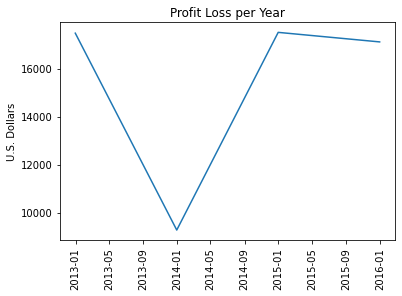

In [13]:
plt.plot(resample.index, resample['New Profit'])
plt.xticks(rotation=90)
plt.ylabel('U.S. Dollars')
plt.title('Profit Loss per Year')
plt.show()

Profit loss seems to have dropped in 2013, but was relatively stead in 2015 to 2016.

#### Return Statistics

20 customers returned 2 or more orders
0 customers returned more than 10 orders

546 customers returned 2 or more distinct products
2 customers returned more than 10 distinct products

983 customers returned a quantity of 2 or more items
225 customers returned a quantity of more than 10 items


Text(0, 0.5, 'Number of Customers')

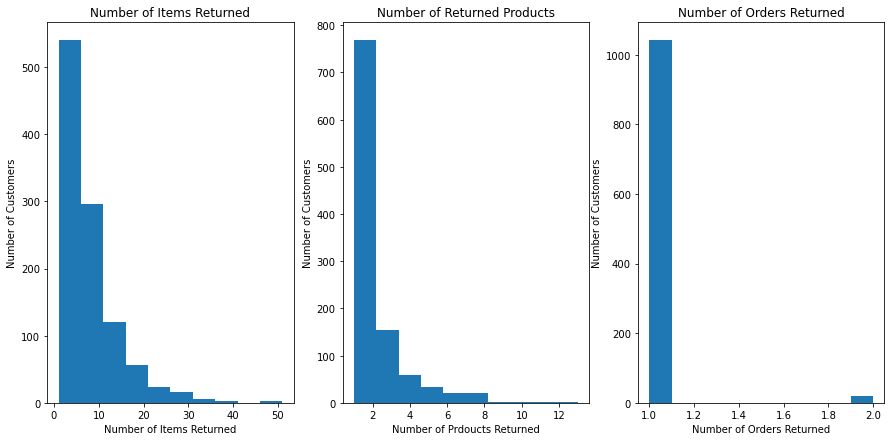

In [14]:
quantity = list()
products = list()
orders = list()

for cust, frame in merged.groupby('Customer.ID'):
    quantity.append((cust, sum(frame['Quantity'])))
    products.append((cust, len(set(frame['Product.ID']))))
    orders.append((cust, len(set(frame['Order ID']))))
                     
quantity = pd.DataFrame(quantity, columns=['Customer ID', 'Quantity Returned']).sort_values(by='Quantity Returned')
products = pd.DataFrame(products,  columns=['Customer ID', 'Products Returned']).sort_values(by='Products Returned')
orders = pd.DataFrame(orders,  columns=['Customer ID', 'Orders Returned']).sort_values(by='Orders Returned')

print(f"{len(orders.loc[orders['Orders Returned'] > 1])} customers returned 2 or more orders")
print(f"{len(orders.loc[orders['Orders Returned'] > 10])} customers returned more than 10 orders")
print()
print(f"{len(products.loc[products['Products Returned'] > 1])} customers returned 2 or more distinct products")
print(f"{len(products.loc[products['Products Returned'] > 10])} customers returned more than 10 distinct products")
print()
print(f"{len(quantity.loc[quantity['Quantity Returned'] > 1])} customers returned a quantity of 2 or more items")
print(f"{len(quantity.loc[quantity['Quantity Returned'] > 10])} customers returned a quantity of more than 10 items")

fig, ax = plt.subplots(1, 3, figsize=((15,7)))
ax[0].hist(quantity['Quantity Returned'])
ax[0].set_title('Number of Items Returned')
ax[0].set_xlabel('Number of Items Returned')
ax[0].set_ylabel('Number of Customers')

ax[1].hist(products['Products Returned'])
ax[1].set_title('Number of Returned Products')
ax[1].set_xlabel('Number of Prdoucts Returned')
ax[1].set_ylabel('Number of Customers')

ax[2].hist(orders['Orders Returned'])
ax[2].set_title('Number of Orders Returned')
ax[2].set_xlabel('Number of Orders Returned')
ax[2].set_ylabel('Number of Customers')


#### Regional Returns and Trends

In [15]:
quantity = list()
products = list()
orders = list()

for region, frame in merged.groupby('Region_y'):
    quantity.append((region, sum(frame['Quantity'])))
    products.append((region, len(set(frame['Product.ID']))))
    orders.append((region, len(set(frame['Order ID']))))

quantity = pd.DataFrame(quantity, columns=['Region', 'Quantity Returned']).sort_values(by='Quantity Returned')
products = pd.DataFrame(products,  columns=['Region', 'Products Returned']).sort_values(by='Products Returned')
orders = pd.DataFrame(orders,  columns=['Region', 'Orders Returned']).sort_values(by='Orders Returned')


quant = list(quantity.sort_values('Quantity Returned', ascending=False)['Region'][:5])
prod = list(products.sort_values('Products Returned', ascending=False)['Region'][:5])
ords = list(orders.sort_values('Orders Returned', ascending=False)['Region'][:5])

print(f"You are most likely to return items from the following regions:\n\t{', '.join(quant)}.")
print()
print(f"You are most likely to return products from the following regions:\n\t{', '.join(prod)}.")
print()
print(f"You are most likely to return orders from the following regions:\n\t{', '.join(ords)}.")                                                                            

fig, ax = plt.subplots(1, 3, figsize=((20,7)))

ax[0].hist(quantity['Region'], weights=quantity['Quantity Returned'])
ax[0].set_title('Number of Items Returned')
ax[0].set_ylabel('Items Returned')
ax[0].tick_params(rotation=90)

ax[1].hist(products['Region'], weights=products['Products Returned'])
ax[1].set_title('Number of Returned Products')
ax[1].tick_params(rotation=90)

ax[2].hist(orders['Region'], weights=orders['Orders Returned'])
ax[2].set_title('Number of Orders Returned')
ax[2].tick_params(rotation=90)

You are most likely to return items from the following regions:
	Western Europe, Central America, Western US, Oceania, Southeastern Asia.

You are most likely to return products from the following regions:
	Central America, Western Europe, Western US, Oceania, Southeastern Asia.

You are most likely to return orders from the following regions:
	Western Europe, Central America, Oceania, Western US, Eastern US.


#### Returns by Category

In [16]:
merged.groupby('Category').count().sort_values(by='Product.ID', ascending=False)['Returned'].to_frame()

Returned
Category                 
Office Supplies      1348
Technology            445
Furniture             427

In [17]:
merged.groupby('Sub.Category').count().sort_values(by='Product.ID', ascending=False)['Returned'].to_frame().head()

Returned
Sub.Category          
Binders            269
Art                217
Storage            212
Paper              150
Chairs             147

#### Returns by Shipment

In [18]:
shipped = merged.groupby('Ship.Mode').count()['Returned'].to_frame()
shipped['Returned Ratio'] = shipped['Returned'] / sum(shipped['Returned']) * 100

shipped['Overall Ratio'] = shipped['Returned'] / len(order_data) * 100
shipped.sort_values(by='Returned Ratio', ascending=False)

Returned  Returned Ratio  Overall Ratio
Ship.Mode                                              
Standard Class      1392       62.702703       2.713979
Second Class         396       17.837838       0.772080
First Class          312       14.054054       0.608306
Same Day             120        5.405405       0.233964

1-4. Add a column "Order_Month” with the month that the order was submitted. (2 pts)

In [19]:
merged = pd.merge(order_data, return_data, how='outer', left_on='Order.ID', right_on='Order ID')
merged = merged.drop(columns=['Unnamed: 3', 'Unnamed: 4'], axis=1)
merged['Order.Date'] = pd.to_datetime(merged['Order.Date'])
merged['Order_Month'] = merged['Order.Date'].dt.month
merged

Row.ID                  Order.ID Order.Date Ship.Date       Ship.Mode  \
0       40098  CA-2014-AB10015140-41954 2014-11-11  11/13/14     First Class   
1       40099  CA-2014-AB10015140-41954 2014-11-11  11/13/14     First Class   
2       26341    IN-2014-JR162107-41675 2014-02-05    2/7/14    Second Class   
3       26339    IN-2014-JR162107-41675 2014-02-05    2/7/14    Second Class   
4       26340    IN-2014-JR162107-41675 2014-02-05    2/7/14    Second Class   
...       ...                       ...        ...       ...             ...   
51285    6039   MX-2015-HG1502518-42164 2015-06-09   6/11/15     First Class   
51286   24175    IN-2015-DB132707-42221 2015-08-05   8/10/15  Standard Class   
51287   24105   IN-2015-KH1633058-42154 2015-05-30   5/30/15        Same Day   
51288   34337  US-2014-ZD21925140-41765 2014-05-06   5/10/14  Standard Class   
51289    6147   MX-2013-MC1810093-41416 2013-05-22   5/26/13    Second Class   

        Customer.ID       Customer.Name      Segment  Postal.Code  \
0      AB-100151402       Aaron Bergman     Consumer      73120.0   
1      AB-100151402       Aaron Bergman     Consumer      73120.0   
2         JR-162107       Justin Ritter    Corporate          NaN   
3         JR-162107       Justin Ritter    Corporate          NaN   
4         JR-162107       Justin Ritter    Corporate          NaN   
...             ...                 ...          ...          ...   
51285    HG-1502518       Hunter Glantz     Consumer          NaN   
51286     DB-132707   Deborah Brumfield  Home Office          NaN   
51287    KH-1633058     Katharine Harms    Corporate          NaN   
51288  ZD-219251408  Zuschuss Donatelli     Consumer      37421.0   
51289    MC-1810093       Mick Crebagga     Consumer          NaN   

                    City  ... Discount    Profit Shipping.Cost Order.Priority  \
0          Oklahoma City  ...      0.0    $62.15        40.770           High   
1          Oklahoma City  ...      0.0    $54.71        25.270           High   
2             Wollongong  ...      0.1  -$288.77       923.630       Critical   
3             Wollongong  ...      0.1    $34.42        65.350       Critical   
4             Wollongong  ...      0.1    -$6.03        41.640       Critical   
...                  ...  ...      ...       ...           ...            ...   
51285  Bragança Paulista  ...      0.0     $9.20         1.019           High   
51286         Townsville  ...      0.1    $19.95         1.010         Medium   
51287            Lucknow  ...      0.0     $1.86         1.010           High   
51288        Chattanooga  ...      0.2     $3.34         1.930           High   
51289           Tipitapa  ...      0.0     $1.80         1.002           High   

      New Profit New Sales Returned Order ID Region_y  Order_Month  
0          62.15    221.98      NaN      NaN      NaN           11  
1          54.71    341.96      NaN      NaN      NaN           11  
2        -288.77   3709.40      NaN      NaN      NaN            2  
3          34.42    344.68      NaN      NaN      NaN            2  
4          -6.03    133.92      NaN      NaN      NaN            2  
...          ...       ...      ...      ...      ...          ...  
51285       9.20     84.00      NaN      NaN      NaN            6  
51286      19.95     58.05      NaN      NaN      NaN            8  
51287       1.86     26.94      NaN      NaN      NaN            5  
51288       3.34     16.72      NaN      NaN      NaN            5  
51289       1.80     61.38      NaN      NaN      NaN            5  

[51290 rows x 30 columns]

1-5. Generate a categorical variable which indicates whether an order has been returned or not. (2 pts)

In [20]:
merged['IsReturned'] = merged['Returned'].apply(lambda x: int(x == 'Yes'))
merged.loc[merged['IsReturned'] == 1]

Row.ID                  Order.ID Order.Date Ship.Date       Ship.Mode  \
62      30191  IN-2012-PB19210127-41259 2012-12-16  12/19/12     First Class   
63      30190  IN-2012-PB19210127-41259 2012-12-16  12/19/12     First Class   
64      30187  IN-2012-PB19210127-41259 2012-12-16  12/19/12     First Class   
65      30193  IN-2012-PB19210127-41259 2012-12-16  12/19/12     First Class   
66      30189  IN-2012-PB19210127-41259 2012-12-16  12/19/12     First Class   
...       ...                       ...        ...       ...             ...   
51151   35040  CA-2014-WB21850140-41654 2014-01-15   1/21/14  Standard Class   
51152   35038  CA-2014-WB21850140-41654 2014-01-15   1/21/14  Standard Class   
51160      25   US-2013-SJ2021582-41543 2013-09-26   9/29/13     First Class   
51259   36974  CA-2012-ZC21910140-41271 2012-12-28    1/4/13  Standard Class   
51268   41315    EG-2014-PM894038-41846 2014-07-26   7/30/14  Standard Class   

        Customer.ID     Customer.Name    Segment  Postal.Code           City  \
62      PB-19210127    Phillip Breyer  Corporate          NaN         Taipei   
63      PB-19210127    Phillip Breyer  Corporate          NaN         Taipei   
64      PB-19210127    Phillip Breyer  Corporate          NaN         Taipei   
65      PB-19210127    Phillip Breyer  Corporate          NaN         Taipei   
66      PB-19210127    Phillip Breyer  Corporate          NaN         Taipei   
...             ...               ...        ...          ...            ...   
51151  WB-218501406     William Brown   Consumer      10011.0  New York City   
51152  WB-218501406     William Brown   Consumer      10011.0  New York City   
51160    SJ-2021582      Sarah Jordon   Consumer          NaN     Hermosillo   
51259  ZC-219101402  Zuschuss Carroll   Consumer      60610.0        Chicago   
51268     PM-894038    Paul MacIntyre   Consumer          NaN     Alexandria   

       ...   Profit Shipping.Cost Order.Priority New Profit New Sales  \
62     ...  $720.36       725.570       Critical     720.36   1715.16   
63     ...  $153.75       627.270       Critical     153.75   2197.50   
64     ...  $311.85       458.970       Critical     311.85   1356.03   
65     ...  $114.60       203.920       Critical     114.60    882.15   
66     ...   $68.22        25.480       Critical      68.22    148.32   
...    ...      ...           ...            ...        ...       ...   
51151  ...   $17.34         2.670         Medium      17.34     49.54   
51152  ...    $7.60         1.690         Medium       7.60     16.52   
51160  ...  -$75.56         1.085         Medium     -75.56    181.12   
51259  ...  -$50.67         5.290            Low     -50.67     38.98   
51268  ...    $9.03         1.050         Medium       9.03     25.83   

      Returned                  Order ID         Region_y Order_Month  \
62         Yes  IN-2012-PB19210127-41259     Eastern Asia          12   
63         Yes  IN-2012-PB19210127-41259     Eastern Asia          12   
64         Yes  IN-2012-PB19210127-41259     Eastern Asia          12   
65         Yes  IN-2012-PB19210127-41259     Eastern Asia          12   
66         Yes  IN-2012-PB19210127-41259     Eastern Asia          12   
...        ...                       ...              ...         ...   
51151      Yes  CA-2014-WB21850140-41654       Eastern US           1   
51152      Yes  CA-2014-WB21850140-41654       Eastern US           1   
51160      Yes   US-2013-SJ2021582-41543  Central America           9   
51259      Yes  CA-2012-ZC21910140-41271       Central US          12   
51268      Yes    EG-2014-PM894038-41846     North Africa           7   

       IsReturned  
62              1  
63              1  
64              1  
65              1  
66              1  
...           ...  
51151           1  
51152           1  
51160           1  
51259           1  
51268           1  

[2220 rows x 31 columns]

1-6. Generate a feature which can measure how long it takes the company to process each order. (Process.Time = Ship.Date - Order.Date) (3 pts)

In [21]:
merged['Ship.Date'] = pd.to_datetime(merged['Ship.Date'])
merged['Order.Date'] = pd.to_datetime(merged['Order.Date'])
merged['Process.Time'] = (merged['Ship.Date'] - merged['Order.Date']).dt.days
merged

Row.ID                  Order.ID Order.Date  Ship.Date       Ship.Mode  \
0       40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13     First Class   
1       40099  CA-2014-AB10015140-41954 2014-11-11 2014-11-13     First Class   
2       26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07    Second Class   
3       26339    IN-2014-JR162107-41675 2014-02-05 2014-02-07    Second Class   
4       26340    IN-2014-JR162107-41675 2014-02-05 2014-02-07    Second Class   
...       ...                       ...        ...        ...             ...   
51285    6039   MX-2015-HG1502518-42164 2015-06-09 2015-06-11     First Class   
51286   24175    IN-2015-DB132707-42221 2015-08-05 2015-08-10  Standard Class   
51287   24105   IN-2015-KH1633058-42154 2015-05-30 2015-05-30        Same Day   
51288   34337  US-2014-ZD21925140-41765 2014-05-06 2014-05-10  Standard Class   
51289    6147   MX-2013-MC1810093-41416 2013-05-22 2013-05-26    Second Class   

        Customer.ID       Customer.Name      Segment  Postal.Code  \
0      AB-100151402       Aaron Bergman     Consumer      73120.0   
1      AB-100151402       Aaron Bergman     Consumer      73120.0   
2         JR-162107       Justin Ritter    Corporate          NaN   
3         JR-162107       Justin Ritter    Corporate          NaN   
4         JR-162107       Justin Ritter    Corporate          NaN   
...             ...                 ...          ...          ...   
51285    HG-1502518       Hunter Glantz     Consumer          NaN   
51286     DB-132707   Deborah Brumfield  Home Office          NaN   
51287    KH-1633058     Katharine Harms    Corporate          NaN   
51288  ZD-219251408  Zuschuss Donatelli     Consumer      37421.0   
51289    MC-1810093       Mick Crebagga     Consumer          NaN   

                    City  ... Shipping.Cost Order.Priority New Profit  \
0          Oklahoma City  ...        40.770           High      62.15   
1          Oklahoma City  ...        25.270           High      54.71   
2             Wollongong  ...       923.630       Critical    -288.77   
3             Wollongong  ...        65.350       Critical      34.42   
4             Wollongong  ...        41.640       Critical      -6.03   
...                  ...  ...           ...            ...        ...   
51285  Bragança Paulista  ...         1.019           High       9.20   
51286         Townsville  ...         1.010         Medium      19.95   
51287            Lucknow  ...         1.010           High       1.86   
51288        Chattanooga  ...         1.930           High       3.34   
51289           Tipitapa  ...         1.002           High       1.80   

      New Sales Returned Order ID Region_y Order_Month IsReturned  \
0        221.98      NaN      NaN      NaN          11          0   
1        341.96      NaN      NaN      NaN          11          0   
2       3709.40      NaN      NaN      NaN           2          0   
3        344.68      NaN      NaN      NaN           2          0   
4        133.92      NaN      NaN      NaN           2          0   
...         ...      ...      ...      ...         ...        ...   
51285     84.00      NaN      NaN      NaN           6          0   
51286     58.05      NaN      NaN      NaN           8          0   
51287     26.94      NaN      NaN      NaN           5          0   
51288     16.72      NaN      NaN      NaN           5          0   
51289     61.38      NaN      NaN      NaN           5          0   

       Process.Time  
0                 2  
1                 2  
2                 2  
3                 2  
4                 2  
...             ...  
51285             2  
51286             5  
51287             0  
51288             4  
51289             4  

[51290 rows x 32 columns]

1-7. Generate a feature indictes how many times the product has been returned before. (2 pts)

In [22]:
num_returned = merged.groupby('Product.ID').count()['Returned'].to_frame()
num_returned = num_returned.rename(columns={'Returned': 'NumReturned'})
merged = pd.merge(merged, num_returned, left_on='Product.ID', right_index=True, how='outer')
merged

Row.ID                  Order.ID Order.Date  Ship.Date       Ship.Mode  \
0       40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13     First Class   
40637   36383  CA-2013-KN16390140-41338 2013-03-05 2013-03-09  Standard Class   
1       40099  CA-2014-AB10015140-41954 2014-11-11 2014-11-13     First Class   
38335   39335  CA-2015-JC15775140-42186 2015-07-01 2015-07-03    Second Class   
40420   33020  US-2013-KD16345140-41628 2013-12-20 2013-12-25  Standard Class   
...       ...                       ...        ...        ...             ...   
50963   31494  CA-2015-VM21685140-42315 2015-11-07 2015-11-14  Standard Class   
50992   36882  CA-2015-VP21730140-42339 2015-12-01 2015-12-05  Standard Class   
50998   31656  CA-2015-VB21745140-42072 2015-03-09 2015-03-12     First Class   
51125   35609  CA-2012-WB21850140-41216 2012-11-03 2012-11-10  Standard Class   
51276   31316  CA-2012-ZD21925140-41147 2012-08-26 2012-08-31    Second Class   

        Customer.ID       Customer.Name      Segment  Postal.Code  \
0      AB-100151402       Aaron Bergman     Consumer      73120.0   
40637  KN-163901406   Katherine Nockton    Corporate      19120.0   
1      AB-100151402       Aaron Bergman     Consumer      73120.0   
38335  JC-157751404        John Castell     Consumer      90032.0   
40420  KD-163451402    Katherine Ducich     Consumer      60623.0   
...             ...                 ...          ...          ...   
50963  VM-216851406     Valerie Mitchum  Home Office       7090.0   
50992  VP-217301406        Victor Preis  Home Office      10011.0   
50998  VB-217451408    Victoria Brennan    Corporate      31907.0   
51125  WB-218501404       William Brown     Consumer      90045.0   
51276  ZD-219251404  Zuschuss Donatelli     Consumer      94109.0   

                City  ... Order.Priority New Profit New Sales Returned  \
0      Oklahoma City  ...           High      62.15    221.98      NaN   
40637   Philadelphia  ...         Medium     -93.23    466.16      NaN   
1      Oklahoma City  ...           High      54.71    341.96      NaN   
38335    Los Angeles  ...           High       5.13    436.00      NaN   
40420        Chicago  ...         Medium     -71.81    359.06      NaN   
...              ...  ...            ...        ...       ...      ...   
50963      Westfield  ...            Low      12.03     46.26      NaN   
50992  New York City  ...           High     163.82    546.06      NaN   
50998       Columbus  ...           High     168.44    647.84      NaN   
51125    Los Angeles  ...         Medium     139.99    447.97      NaN   
51276  San Francisco  ...           High      16.01    213.48      NaN   

      Order ID Region_y Order_Month IsReturned Process.Time  NumReturned  
0          NaN      NaN          11          0            2            0  
40637      NaN      NaN           3          0            4            0  
1          NaN      NaN          11          0            2            0  
38335      NaN      NaN           7          0            2            0  
40420      NaN      NaN          12          0            5            0  
...        ...      ...         ...        ...          ...          ...  
50963      NaN      NaN          11          0            7            0  
50992      NaN      NaN          12          0            4            0  
50998      NaN      NaN           3          0            3            0  
51125      NaN      NaN          11          0            7            0  
51276      NaN      NaN           8          0            5            0  

[51290 rows x 33 columns]

In [23]:
merged.loc[merged['NumReturned'] > 1]

Row.ID                  Order.ID Order.Date  Ship.Date       Ship.Mode  \
2       26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07    Second Class   
782     21264    IN-2015-MB173057-42179 2015-06-24 2015-06-28  Standard Class   
867      4116   MX-2014-CM1271582-41885 2014-09-03 2014-09-05     First Class   
2002    30218   ID-2015-MM1726078-42181 2015-06-26 2015-07-01  Standard Class   
2735    24984   IN-2015-AF1087058-42090 2015-03-27 2015-03-30    Second Class   
...       ...                       ...        ...        ...             ...   
47914   37228  US-2015-RL19615140-42193 2015-07-08 2015-07-10     First Class   
49896   31784  CA-2012-SA20830140-41210 2012-10-28 2012-10-30     First Class   
44888   39667  CA-2014-MG17890140-41930 2014-10-18 2014-10-22  Standard Class   
46210   35514  CA-2015-NC18535140-42096 2015-04-02 2015-04-04     First Class   
47848   38859  US-2014-RB19570140-41886 2014-09-04 2014-09-08  Standard Class   

        Customer.ID     Customer.Name      Segment  Postal.Code  \
2         JR-162107     Justin Ritter    Corporate          NaN   
782       MB-173057   Maria Bertelson     Consumer          NaN   
867      CM-1271582    Craig Molinari    Corporate          NaN   
2002     MM-1726078   Magdelene Morse     Consumer          NaN   
2735     AF-1087058      Art Ferguson     Consumer          NaN   
...             ...               ...          ...          ...   
47914  RL-196151406         Rob Lucas     Consumer      19120.0   
49896  SA-208301402      Sue Ann Reed     Consumer      60610.0   
44888  MG-178901404  Michael Granlund  Home Office      93727.0   
46210  NC-185351404     Nick Crebassa    Corporate      94110.0   
47848  RB-195701402       Rob Beeghly     Consumer      60610.0   

                City  ... Order.Priority New Profit New Sales Returned  \
2         Wollongong  ...       Critical    -288.77   3709.40      NaN   
782           Sydney  ...         Medium     -96.26   1236.47      NaN   
867           Cancún  ...       Critical     232.00    976.96      NaN   
2002    Kuala Lumpur  ...         Medium      82.26   2747.70      Yes   
2735      Aurangabad  ...         Medium      68.55   2289.75      NaN   
...              ...  ...            ...        ...       ...      ...   
47914   Philadelphia  ...           High    -114.00    683.99      NaN   
49896        Chicago  ...           High     341.99   2735.95      Yes   
44888         Fresno  ...         Medium      21.29    120.67      NaN   
46210  San Francisco  ...         Medium      85.18    482.66      Yes   
47848        Chicago  ...         Medium       0.00    198.74      Yes   

                       Order ID           Region_y Order_Month IsReturned  \
2                           NaN                NaN           2          0   
782                         NaN                NaN           6          0   
867                         NaN                NaN           9          0   
2002    ID-2015-MM1726078-42181  Southeastern Asia           6          1   
2735                        NaN                NaN           3          0   
...                         ...                ...         ...        ...   
47914                       NaN                NaN           7          0   
49896  CA-2012-SA20830140-41210         Central US          10          1   
44888                       NaN                NaN          10          0   
46210  CA-2015-NC18535140-42096         Western US           4          1   
47848  US-2014-RB19570140-41886         Central US           9          1   

      Process.Time  NumReturned  
2                2            2  
782              4            2  
867              2            2  
2002             5            2  
2735             3            2  
...            ...          ...  
47914            2            2  
49896            2            2  
44888            4            2  
46210            2            2  
47848            4            2  

[13748

1-8. Save the final dataframe as `YourName_Problem3_EDA_DONE.csv` and submit. (3 pts)

In [24]:
merged.to_csv("Jeremiah_Problem3_EDA_DONE.csv")

### 2. Classification Problem. (35 pts)
In this problem, the task is to classify using two given data sets, `Data1.csv` and `Data1_Class.csv`. `Data1.csv` file has two features, $X$ and $Y$, and `Data1_Class.csv` has the true class label of the data. `Data1_Class.csv` must not be opened until step 8. 

2-1. Load the data `Data1.csv`. (2 pts)

In [25]:
data1 = pd.read_csv('Data1.csv').drop('Unnamed: 0', axis=1)
data1

X         Y
0    0.759596  0.338615
1   -0.054081 -1.015513
2    0.239503  0.969903
3   -0.873011  0.033360
4   -0.844087 -0.011398
..        ...       ...
995 -0.483807 -0.897388
996 -0.321947  0.975426
997  0.823918  0.544920
998  0.549605  0.900108
999 -0.164530 -0.850531

[1000 rows x 2 columns]

2-2. Randomly select 70% observations and call this dataset `Data1_training`. Visualize the data distribution. (4 pts)

X         Y
933 -0.776675  0.618768
703  0.766052  0.131808
648 -0.631843  0.330623
474  0.609386  0.771623
436 -0.073405  1.001274
..        ...       ...
584 -0.281886  0.708559
976  0.628818  0.404434
90  -0.602854 -0.608043
467  0.039354  0.842227
590 -0.133632  0.819697

[700 rows x 2 columns]

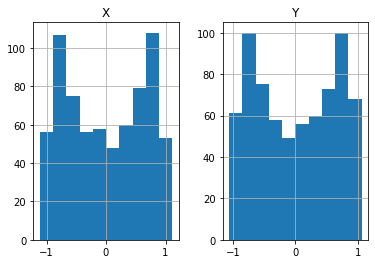

In [26]:
Data1_training = data1.sample(int(len(data1) * 0.7))
Data1_training.hist()
Data1_training

2-3. Transform the `Data1_training` into a new space using $k(x,x')=(x\cdot x)$. Add this feature into `Data1_training`. If you cannot do this, you can ask me for a help. I will provide `Data1_trainig` data after feature mapping and you will recieve 0 on this subproblem. My `Data1_training` will be different from your `Data1_training` obtained from step 2 and you will be using my `Data1_training` from here. (6 pts)

In [27]:
z = list()
for row in Data1_training.iterrows():
    _, values = row
    x_, y_ = values
    arr = np.array([x_, y_])
    z.append(arr.dot(arr))

Data1_training['Z'] = np.array(z)
Data1_training

X         Y         Z
933 -0.776675  0.618768  0.986098
703  0.766052  0.131808  0.604209
648 -0.631843  0.330623  0.508537
474  0.609386  0.771623  0.966753
436 -0.073405  1.001274  1.007938
..        ...       ...       ...
584 -0.281886  0.708559  0.581516
976  0.628818  0.404434  0.558979
90  -0.602854 -0.608043  0.733148
467  0.039354  0.842227  0.710894
590 -0.133632  0.819697  0.689761

[700 rows x 3 columns]

2-4. Cluster `Data1_training` using Kmeans and determine the appropriate cluster number $K$. Make an elbow diagram to prove your answer.  (6 pts)

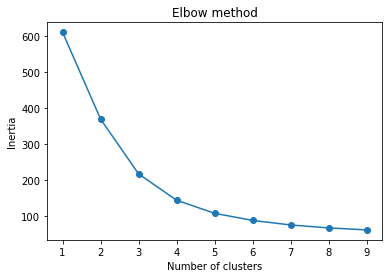

In [28]:
## From demonstration file on DT, Bagging and Clusters
from sklearn.cluster import KMeans

def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
kmeans = KMeans()
kmeans.fit(Data1_training)
plot_inertia(kmeans, Data1_training, range(1, 10))

2-5. Assign the cluster ID to `Data1_training` and make a histrogram of the cluster ID distribution. (2 pts)

In [29]:
kmeans.set_params(n_clusters=4)
kmeans.fit(Data1_training)
Data1_training['Cluster ID'] = kmeans.labels_
Data1_training

X         Y         Z  Cluster ID
933 -0.776675  0.618768  0.986098           2
703  0.766052  0.131808  0.604209           0
648 -0.631843  0.330623  0.508537           2
474  0.609386  0.771623  0.966753           0
436 -0.073405  1.001274  1.007938           2
..        ...       ...       ...         ...
584 -0.281886  0.708559  0.581516           2
976  0.628818  0.404434  0.558979           0
90  -0.602854 -0.608043  0.733148           1
467  0.039354  0.842227  0.710894           2
590 -0.133632  0.819697  0.689761           2

[700 rows x 4 columns]

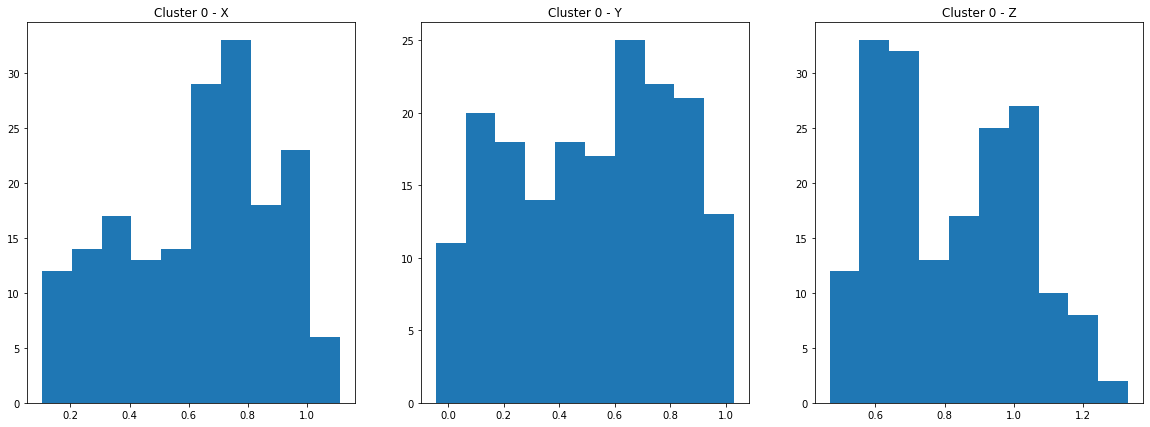

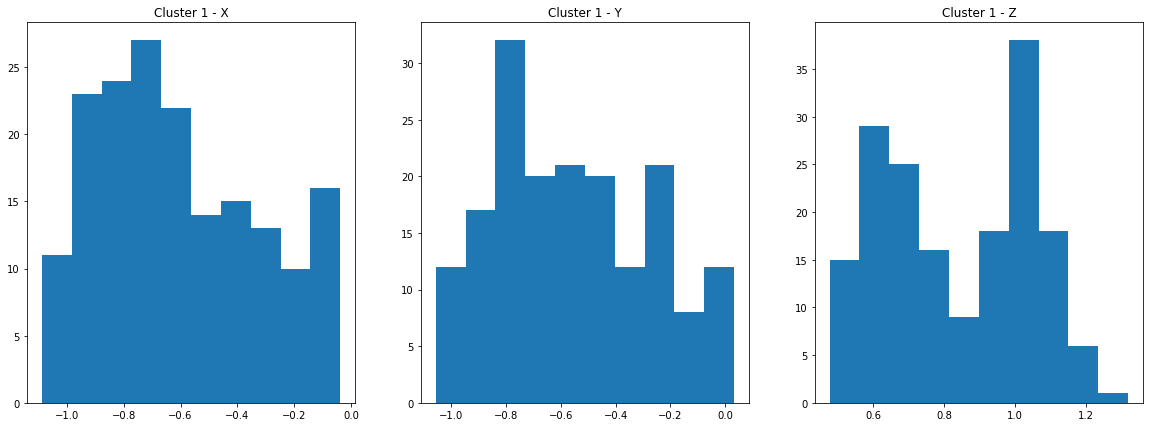

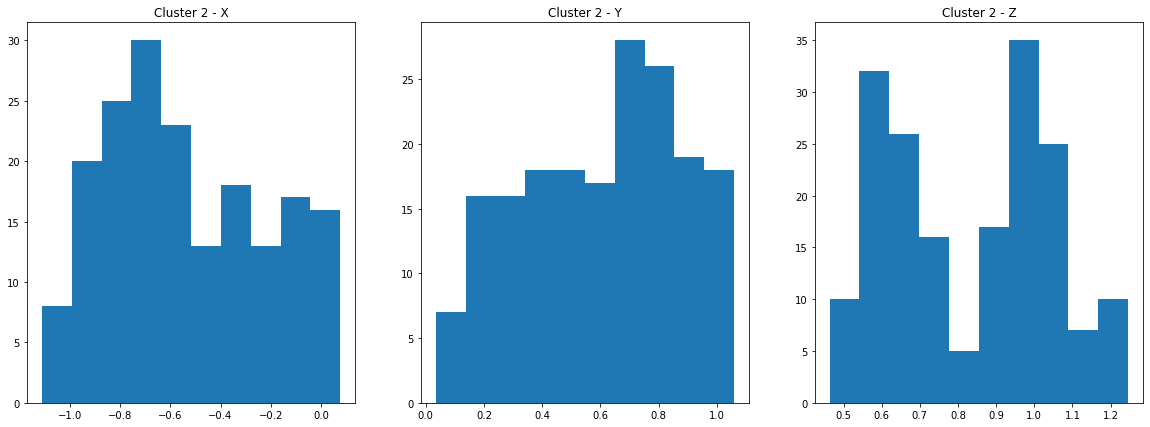

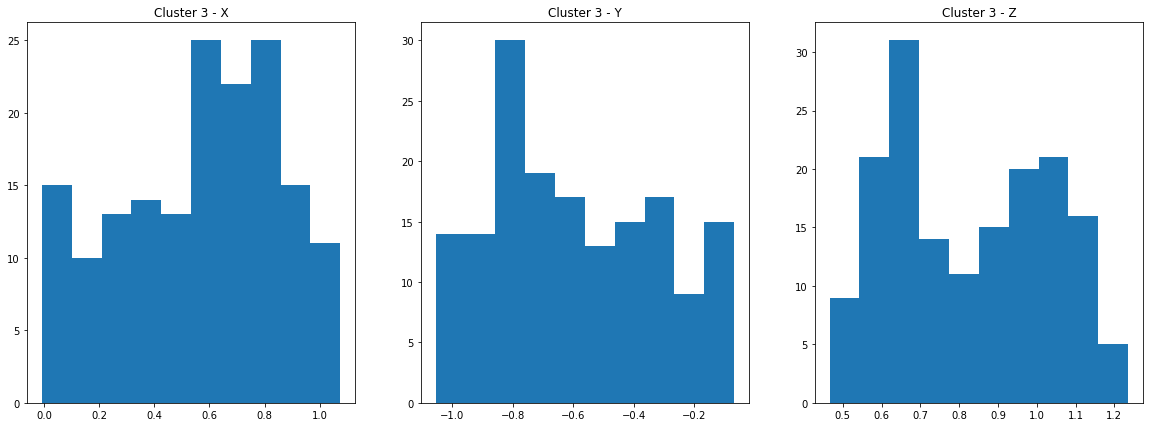

In [30]:
for cl, frame in Data1_training.groupby('Cluster ID'):
    fig, ax = plt.subplots(1, 3, figsize=((20,7)))
    ax[0].hist(frame['X'])
    ax[0].set_title(f'Cluster {cl} - X')
    ax[1].hist(frame['Y'])
    ax[1].set_title(f'Cluster {cl} - Y')
    ax[2].hist(frame['Z'])
    ax[2].set_title(f'Cluster {cl} - Z')

2-6. Train the classification model using `Data1_training`. Report the accuracy of training model. (6 pts)

In [31]:
from sklearn.linear_model import LogisticRegression
x = np.array(Data1_training[['X', 'Y', 'Z']])
y = np.array(Data1_training['Cluster ID'])

lr = LogisticRegression()
lr.fit(x, y)
lr.score(x, y)

0.9957142857142857

2-7. Make a plot of `Data1`. Explain which algorithm is the most appropriate to classfy? (4 pts)

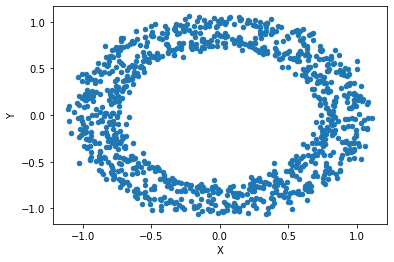

In [32]:
#### Plot #####
data1.plot(kind='scatter', x="X",y="Y")

#### Explanation
I believe that a kernalized SVM is going to be the best model to classify this data because it can project this non-linearly separate data onto a higher dimension. This may allow for the data to be easily separable.

2-8. Using the algorithm answered in 7, make a classifcation model and report the accuracy. (5 pts)

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

cls = pd.read_csv("Data1_Class.csv").drop('Unnamed: 0', axis=1)
X_train, X_test, y_train, y_test = train_test_split(np.array(data1), np.array(cls['Class']), test_size=0.3, random_state=30)
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [34]:
svm.score(X_train, y_train)

0.9814285714285714

In [35]:
svm.score(X_test, y_test)

0.98

### 3. Gradient Descent Problem. (25 pts)
The task of this problem is to numerically find the minimum solution of the function below by improving the initial guess. 
$$F(\textbf{X})=x_1^2 + x_1x_2+2x_1x_3+5x_2^2+6x_2x_3+x_3^2+2x_1-8x_2+9x_3+x_1x_4+x_2x_5$$
Assume the initial guess of $\textbf{X}=[2,2,2,2,2]$, the learning rate $\eta=0.01$, and the critical value $\epsilon=0.02$.

Here is the pseudo code:
1. Initialize the weights $\textbf{X}$ randomly.
2. Calculate the gradients $\textbf{G}$ of cost function w.r.t parameters. 
3. Update the weights by an amount proportional to $\textbf{G}$.
4. Repeat until the cost $J(\textbf{X})$ stops reducing, or some other pre-defined termination criteria is met.

3-1. Evaluate $F(\textbf{X})$ using the initial $\textbf{x}$. (2 pts)

In [36]:
def fx(w) -> float:
    """ Evaluates the F(X) function """
            # x1^2            x1*x2             2*x1*x3              5*x2^2               6*x2*x3
    return pow(w[0], 2) + (w[0] * w[1]) + (2 * w[0] * w[2]) + (5 * pow(w[1], 2)) + (6 * w[1] * w[2]) + \
        pow(w[2], 2) + (2 * w[0]) - (8 * w[1]) + (9 * w[2]) + (w[0] * w[3]) + (w[1] * w[4])
           # x3^2           2*x1       8*x2          9*x3          x1*x4            x2 * x5
X = np.array([2,2,2,2,2])
fx(X)

78

3-2. Evaluate $\textbf{G}$ using the given $\eta=0.01$. (2 pts)

In [37]:
def _G(w):
    """ Calculates the gradients """
    dx1 = (2 * w[0]) + w[1] + (2 * w[2]) + 2 + w[3]
    dx2 = w[0] + (10 * w[1]) + (6 * w[2]) - 8 + w[4]
    dx3 = (2 * w[0]) + (6 * w[1]) + (2 * w[2]) + 9
    dx4 = w[0]
    dx5 = w[1]
    return np.array([dx1, dx2, dx3, dx4, dx5])

def G(w, n):
    """ Updates the weights using the gradients """
    g = _G(w)
    return n * g

n = 0.01
g = G(X, n)
g

array([0.14, 0.28, 0.29, 0.02, 0.02])

3-3. Update $\textbf{X}$. (2 pts)

In [38]:
X = X - g
X

array([1.86, 1.72, 1.71, 1.98, 1.98])

3-4. Determine $J(\textbf{X})$. How far is it off from the critical value? (1 pts)

In [39]:
def error(val, ep):
    """ Evaluates the new output and determines how far it is off the critical value ep """
    return abs(val - ep)

ep = 0.02
error(fx(X), ep)

60.8017

3-5. Repeat steps 1 to 4 untile you observe the function converges. Report the iteration number $i$. It would be easy if you make a function that repeats step 1 to 4, e.g., `for` loop. (10 pts)

In [40]:
def descend(X, n, ep, max_iterations: int = 1000):
    """ Descends until J(X) reaches the critical value """
    preds = list()
    errors = list()
    for i in range(max_iterations):
        val = fx(X)
        er = error(val, ep)
        if er <= 0.01 or (errors and er > errors[-1]):
            break
        preds.append(val)
        errors.append(er)
        X = X - G(X, n)
    return i, preds

X = np.array([2,2,2,2,2])
n = 0.01
ep = 0.02
iters, preds = descend(X, n, ep)

3-6. Make a graph of $F(\textbf{X})$ vs. iteration $i$. (3 pts)

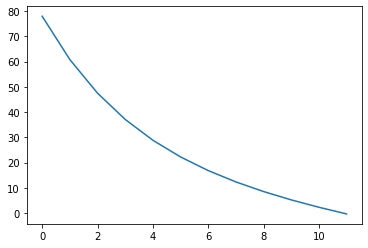

In [41]:
plt.plot(range(iters), preds)